**PYTORCH WITH COMPUTER VISION**

*Model CNN with datasets FashionMNIST*

# 1. Import necessary library

In [1]:
# import torch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import numpy
import numpy as np
# import matplotlib
import matplotlib.pyplot as plt

import time

# import math
import math

print(torch.__version__)
print(torchvision.__version__)

2.0.0+cu118
0.15.1+cu118


# 2. Download FashionMNIST datasets

In [2]:
train_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = None
)
test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)
train_data , test_data

100%|██████████| 26421880/26421880 [00:00<00:00, 118060765.02it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 9358548.73it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




100%|██████████| 4422102/4422102 [00:00<00:00, 60400223.09it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 1574699.31it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

- Show infomation of datasets

In [3]:
print("Shape of training features : ",train_data.data.shape)
print("Shape of training labels : ",train_data.targets.shape)
print("Shape of testing features : ",test_data.data.shape)
print("Shape of testing labels : ",test_data.data.shape)
print("-"*30)
print("Label Unique#")
print(train_data.targets.unique())
print("-"*30)
print("Label Classes#")
print(train_data.classes)

Shape of training features :  torch.Size([60000, 28, 28])
Shape of training labels :  torch.Size([60000])
Shape of testing features :  torch.Size([10000, 28, 28])
Shape of testing labels :  torch.Size([10000, 28, 28])
------------------------------
Label Unique#
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
------------------------------
Label Classes#
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


- Visualize 100 image of dataset

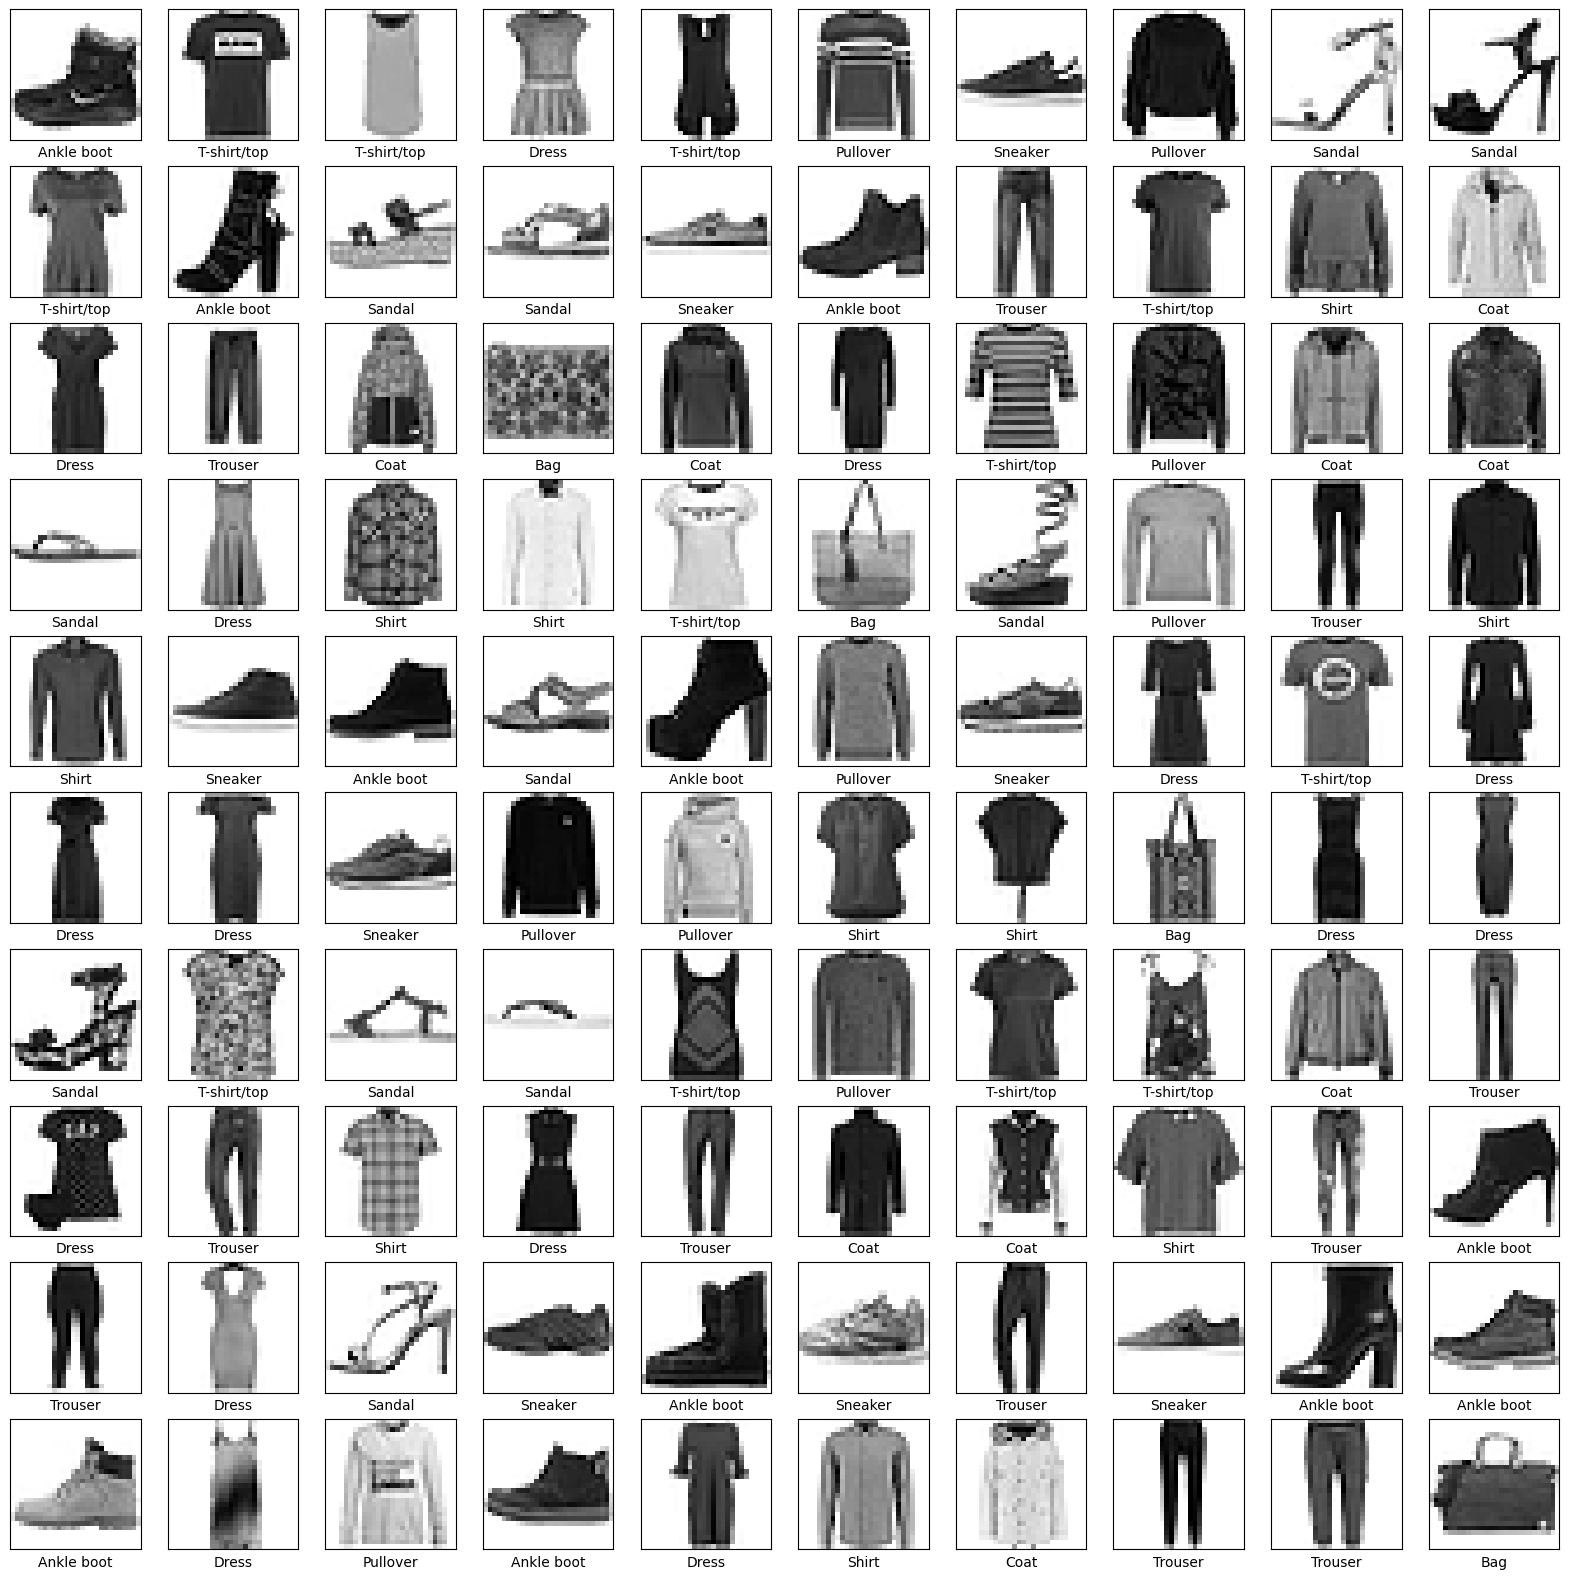

In [4]:
# Show 8x8 = 64 100 image and lable of train_data
numbers_to_display = 100
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(20,20))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([]) # don't show number in horizontal axis
    plt.yticks([]) # don't show number in vertical axis
    plt.imshow(train_data.data[i], cmap=plt.cm.binary) 
    plt.xlabel(train_data.classes[train_data.targets[i].item()])
plt.show()

- Using DataLoader 

In [5]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(
    dataset= train_data,
    batch_size = BATCH_SIZE,
    shuffle= True
)

test_dataloader = DataLoader(
    dataset= test_data,
    batch_size = BATCH_SIZE,
    shuffle= False
)

print(f"BATCH_SIZE = {BATCH_SIZE}")
print(f"{len(train_dataloader)} batch in {len(train_dataloader.dataset)} training samples")
print(f"{len(test_dataloader)} batch in {len(test_dataloader.dataset)} testing samples")

BATCH_SIZE = 32
1875 batch in 60000 training samples
313 batch in 10000 testing samples


In [6]:
train_features , train_labels = next(iter(train_dataloader))
print("Shape of features or labels in 1 batch")
train_features.shape , train_labels.shape

Shape of features or labels in 1 batch


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

# 3. Build Model

- ModelV0 : hidden units won't change

In [7]:
class FashionMNIST_CNN_V0(nn.Module):
    def __init__(self,input_units,hidden_units,output_units):
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=0
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=0
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv_block2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=0
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=0
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier  = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=10*4*4,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_units)
        )

    def forward(self,x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.classifier(x)
        return x

- ModelV1 : hidden units change exponential 2

In [8]:
class FashionMNIST_CNN_V1(nn.Module):
    def __init__(self,input_units,output_units):
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_units,
                out_channels=6,
                kernel_size=3,
                stride=1,
                padding=0
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=6,
                out_channels=12,
                kernel_size=3,
                stride=1,
                padding=0
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv_block2 = nn.Sequential(
            nn.Conv2d(
                in_channels=12,
                out_channels=24,
                kernel_size=3,
                stride=1,
                padding=0
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=24,
                out_channels=48,
                kernel_size=3,
                stride=1,
                padding=0
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier  = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=48*4*4,
                      out_features=48),
            nn.ReLU(),
            nn.Linear(in_features=48,
                      out_features=output_units)
        )

    def forward(self,x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.classifier(x)
        return x

In [9]:
modelV0 = FashionMNIST_CNN_V0(
    input_units = 1,
    hidden_units=10,
    output_units = 10
)

print(modelV0)

FashionMNIST_CNN_V0(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=160, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
  )
)


In [10]:
modelV1 = FashionMNIST_CNN_V1(
    input_units = 1,
    output_units = 10
)
print(modelV1)

FashionMNIST_CNN_V1(
  (conv_block1): Sequential(
    (0): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(24, 48, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=768, out_features=48, bias=True)
    (2): ReLU()
    (3): Linear(in_features=48, out_features=10, bias=True)
  )
)


# 4. Loss, Optimizer and Accuracy func

In [11]:
loss_fn = nn.CrossEntropyLoss()
optV0 = torch.optim.SGD(params=modelV0.parameters(),lr=0.08)
optV1 = torch.optim.SGD(params=modelV1.parameters(),lr=0.08)

In [12]:
try :
    from torchmetrics import Accuracy,ConfusionMatrix
except:
    ! pip install torchmetrics
    from torchmetrics import Accuracy,ConfusionMatrix

accuracy_fn = Accuracy(task="multiclass", num_classes=len(train_data.classes))
confusionMatrix = ConfusionMatrix(task="multiclass", num_classes=len(train_data.classes))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 19.2 MB/s eta 0:00:00


# 5. Training model

In [13]:
from tqdm.auto import tqdm 

def training(model : nn.Module,
            loss_fn : nn.CrossEntropyLoss,
            opt_fn : torch.optim.SGD,
            accuracy_fn,
            EPOCHS=12):
    cTime = time.time()

    epoch_list = []
    loss_train_list = []
    loss_test_list = []
    acc_train_list = []
    acc_test_list = []

    for epoch in tqdm(range(EPOCHS)):
        print(f"\nEPOCH {epoch}#")
        print("-"*30)
        # training model 
        model.train()

        loss_train = 0
        acc_train = 0

        for batch,(X,y) in enumerate(train_dataloader):
            y_pred = model(X)
            loss = loss_fn(y_pred,y)
            loss_train += loss

            y_pred_label = y_pred.argmax(dim=1)
            acc_train += accuracy_fn(y_pred_label,y)

            opt_fn.zero_grad()
            loss.backward()
            opt_fn.step()

            if batch*BATCH_SIZE % 6000 ==0:
                print(f"Processing {batch*BATCH_SIZE}/{len(train_dataloader.dataset)}")

        loss_train /= len(train_dataloader)
        acc_train /= len(train_dataloader)

        # evaluting model
        model.eval()

        loss_test = 0
        acc_test = 0
        with torch.inference_mode():
            for X,y in test_dataloader:
                y_pred = model(X)
                loss_test += loss_fn(y_pred,y)

                y_pred_label = y_pred.argmax(dim=1)
                acc_test += accuracy_fn(y_pred_label,y)

            loss_test /= len(test_dataloader)
            acc_test /= len(test_dataloader)
        
        print(f"# Loss train : {loss_train}, Acc train : {acc_train}, Loss test : {loss_test}, Acc test : {acc_test}")
        epoch_list.append(epoch)
        loss_train_list.append(loss_train.detach().numpy())
        loss_test_list.append(loss_test.detach().numpy())
        acc_train_list.append(acc_train)
        acc_test_list.append(acc_test)

        pTime = time.time() - cTime
    
    return model , (epoch_list,loss_train_list,loss_test_list,acc_train_list,acc_test_list), pTime


In [14]:
%%time
modelV0, eval_V0, timeV0 = training(model=modelV0,
                                loss_fn=loss_fn,
                                opt_fn=optV0,
                                accuracy_fn=accuracy_fn)

  0%|          | 0/12 [00:00<?, ?it/s]


EPOCH 0#
------------------------------
Processing 0/60000
Processing 12000/60000
Processing 24000/60000
Processing 36000/60000
Processing 48000/60000
# Loss train : 0.855239987373352, Acc train : 0.670283317565918, Loss test : 0.5852510929107666, Acc test : 0.7637779712677002

EPOCH 1#
------------------------------
Processing 0/60000
Processing 12000/60000
Processing 24000/60000
Processing 36000/60000
Processing 48000/60000
# Loss train : 0.49591484665870667, Acc train : 0.8079500198364258, Loss test : 0.46717390418052673, Acc test : 0.8239816427230835

EPOCH 2#
------------------------------
Processing 0/60000
Processing 12000/60000
Processing 24000/60000
Processing 36000/60000
Processing 48000/60000
# Loss train : 0.4168179929256439, Acc train : 0.8493833541870117, Loss test : 0.3887366056442261, Acc test : 0.8625199794769287

EPOCH 3#
------------------------------
Processing 0/60000
Processing 12000/60000
Processing 24000/60000
Processing 36000/60000
Processing 48000/60000
# Los

In [15]:
%%time
modelV1, eval_V1, timeV1 = training(model=modelV1,
                                loss_fn=loss_fn,
                                opt_fn=optV1,
                                accuracy_fn=accuracy_fn)

  0%|          | 0/12 [00:00<?, ?it/s]


EPOCH 0#
------------------------------
Processing 0/60000
Processing 12000/60000
Processing 24000/60000
Processing 36000/60000
Processing 48000/60000
# Loss train : 0.7192724347114563, Acc train : 0.727400004863739, Loss test : 0.4426955580711365, Acc test : 0.833765983581543

EPOCH 1#
------------------------------
Processing 0/60000
Processing 12000/60000
Processing 24000/60000
Processing 36000/60000
Processing 48000/60000
# Loss train : 0.38359466195106506, Acc train : 0.8582833409309387, Loss test : 0.3856985569000244, Acc test : 0.8542332053184509

EPOCH 2#
------------------------------
Processing 0/60000
Processing 12000/60000
Processing 24000/60000
Processing 36000/60000
Processing 48000/60000
# Loss train : 0.3268964886665344, Acc train : 0.8770333528518677, Loss test : 0.33682727813720703, Acc test : 0.8774960041046143

EPOCH 3#
------------------------------
Processing 0/60000
Processing 12000/60000
Processing 24000/60000
Processing 36000/60000
Processing 48000/60000
# Los

# 6. Show features of image after CNN

In [16]:
def features_cnn(model:nn.Module,x,y):
    plt.figure(figsize=(20,20))
    for model_childrens in model.children():
        for children in model_childrens:
            x = children(x)
            if type(children) == nn.Conv2d or type(children) == nn.MaxPool2d:
                h = x.shape[2]
                c = x.shape[1]
                display_grid = np.zeros((h, h* c))
                for i in range(len(x[1])) :
                    display_grid[:,i * h : (i + 1) * h] = x[1][i].detach().numpy()
                scale = 20. / c
                plt.figure(figsize=(scale * c, scale))
                plt.title(f"{children.__class__.__name__} ({c},{h},{h})")
                plt.axis(False)
                plt.imshow(display_grid)
                plt.show()

<Figure size 2000x2000 with 0 Axes>

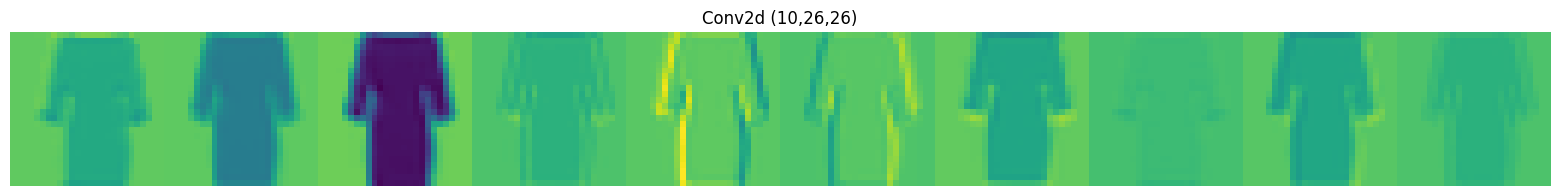

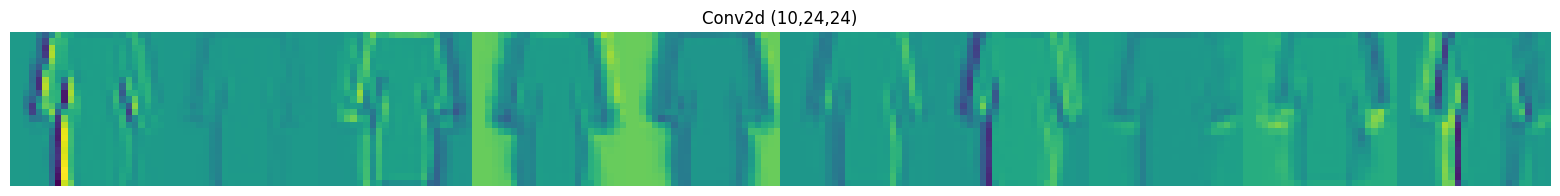

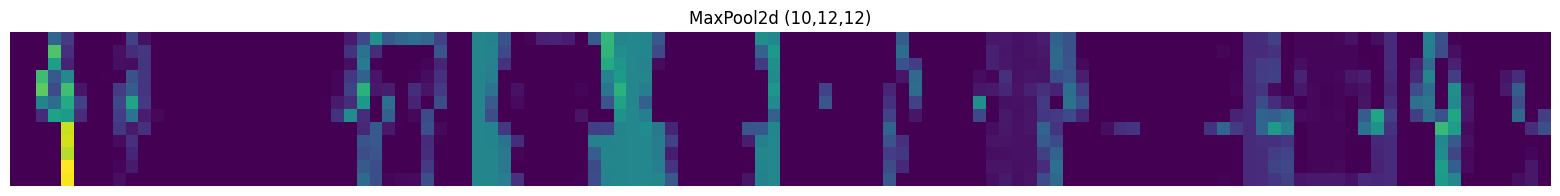

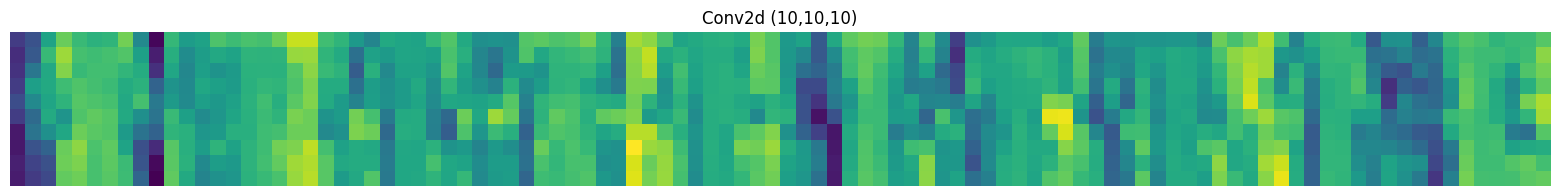

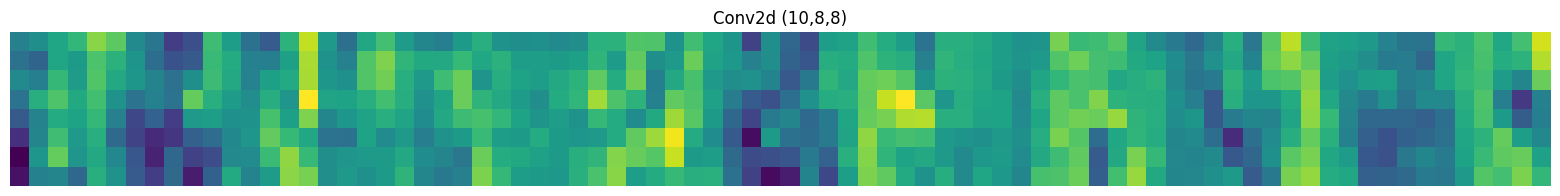

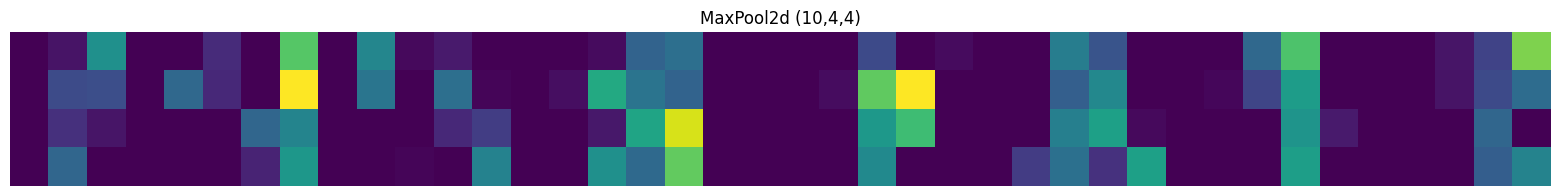

In [74]:
x1,y1 = next(iter(train_dataloader))
features_cnn(modelV0,x1,y1)

<Figure size 2000x2000 with 0 Axes>

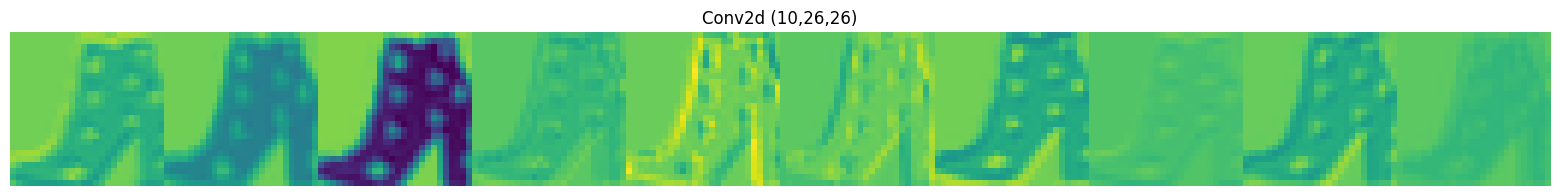

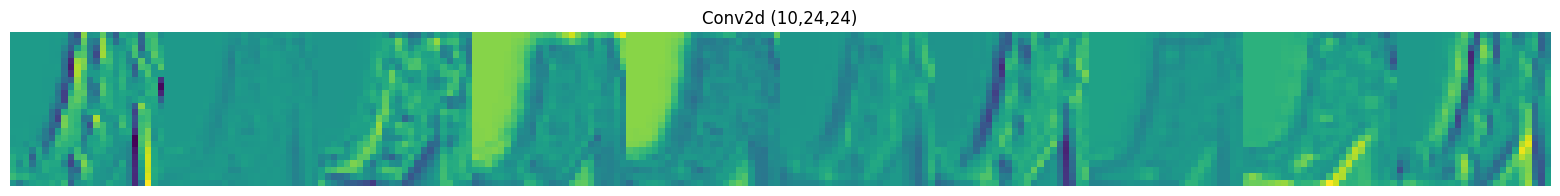

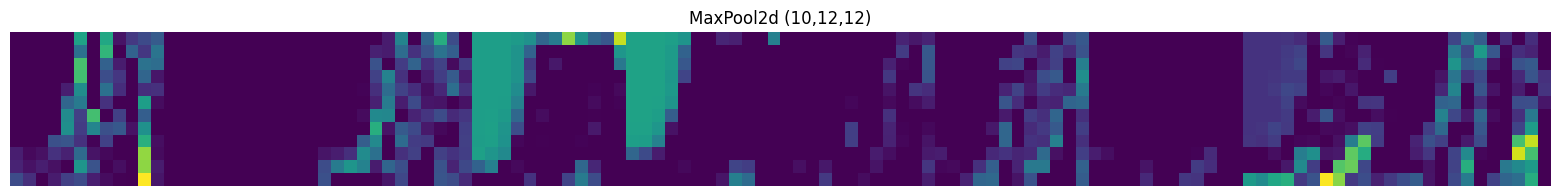

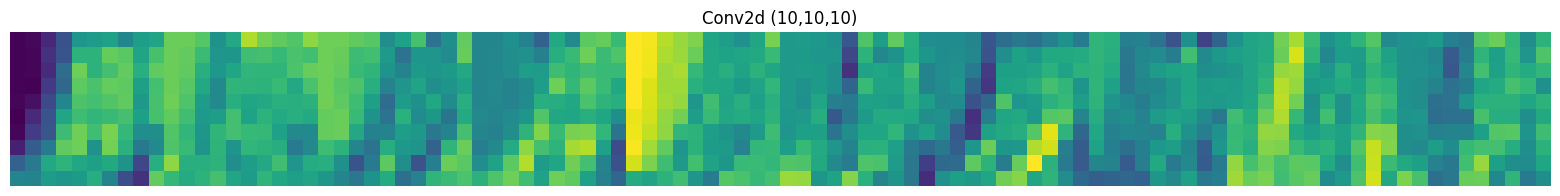

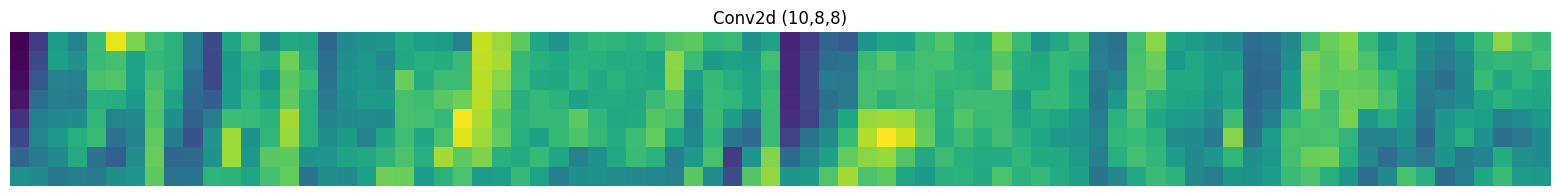

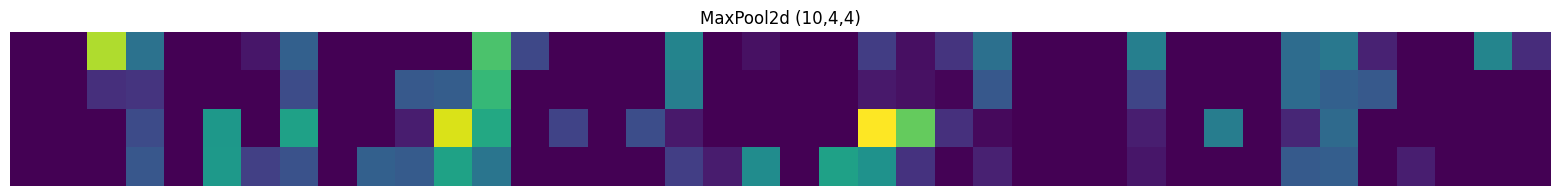

In [75]:
x2,y2= next(iter(train_dataloader))
features_cnn(modelV0,x2,y2)

<Figure size 2000x2000 with 0 Axes>

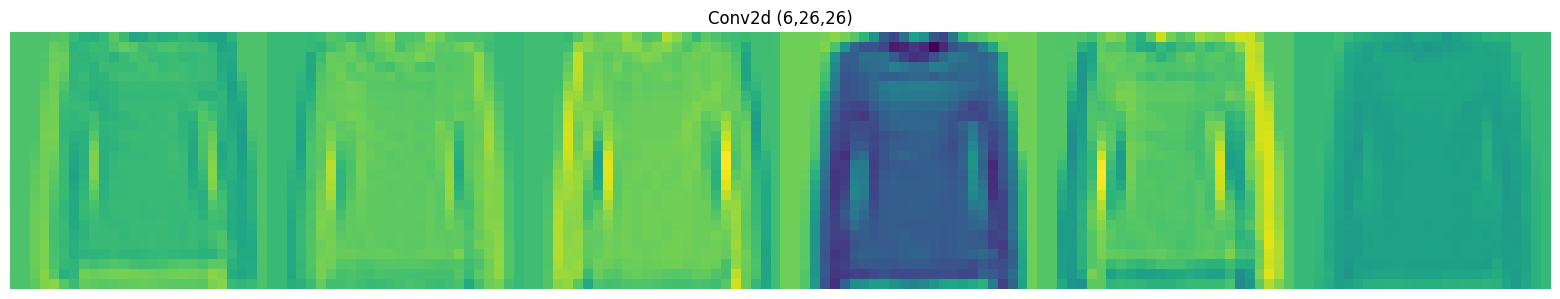

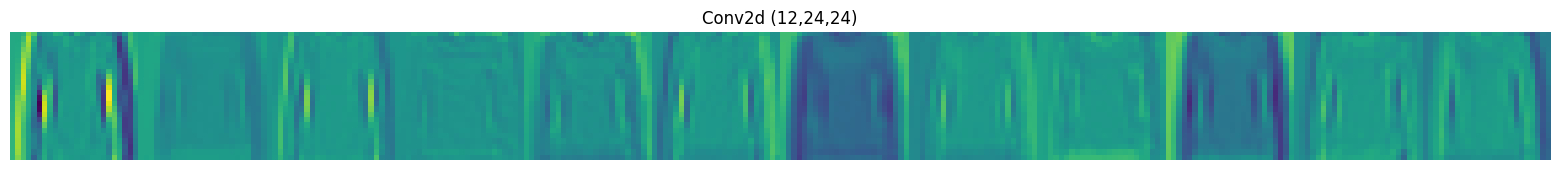

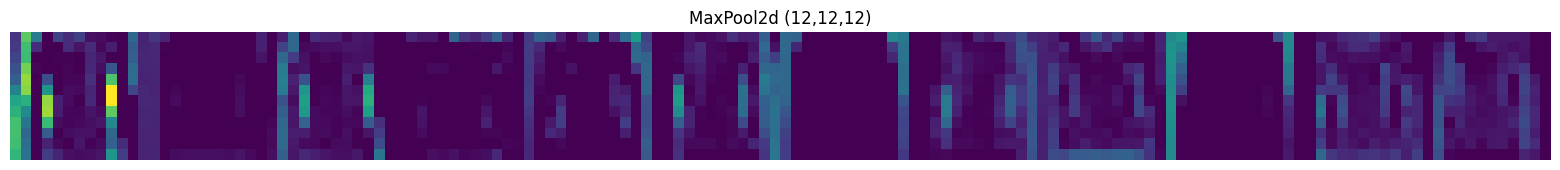

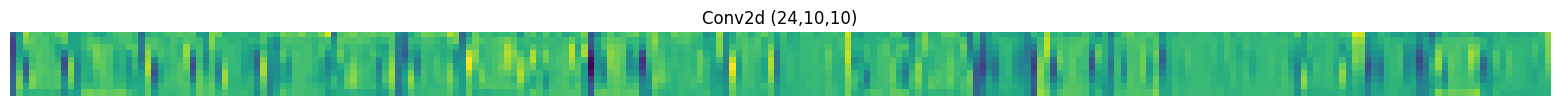

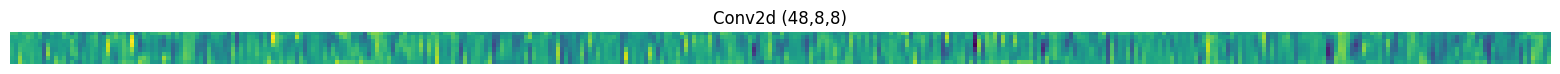

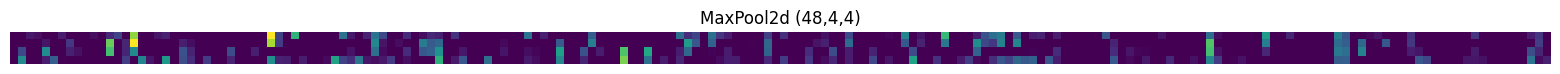

In [76]:
x1,y1 = next(iter(train_dataloader))
features_cnn(modelV1,x1,y1)

<Figure size 2000x2000 with 0 Axes>

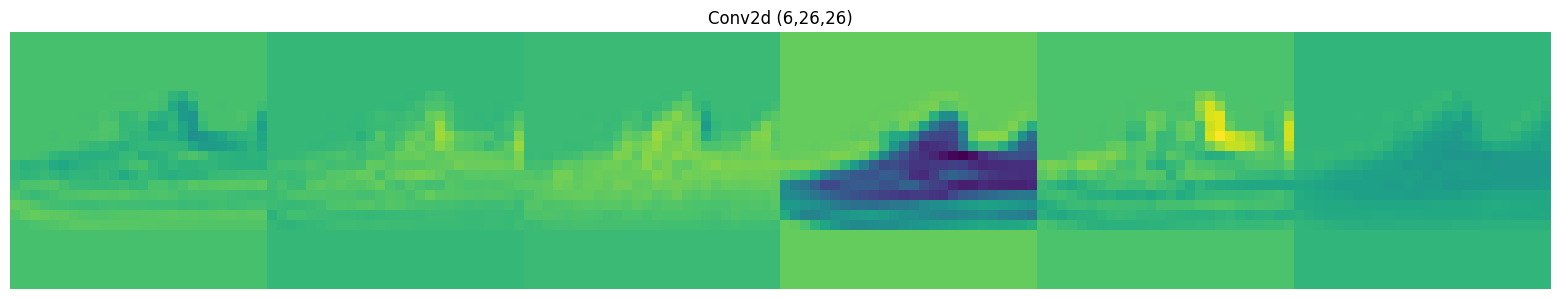

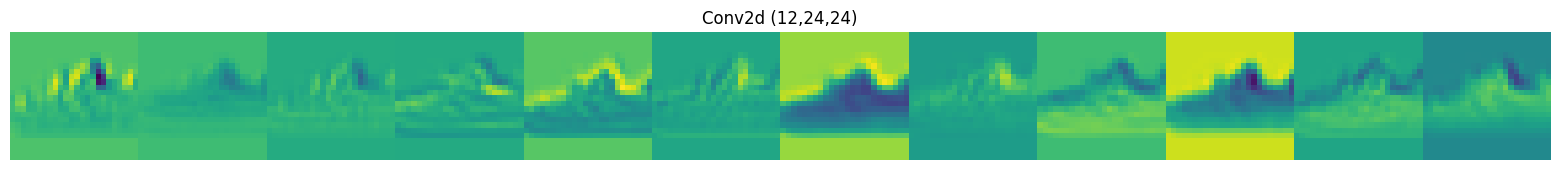

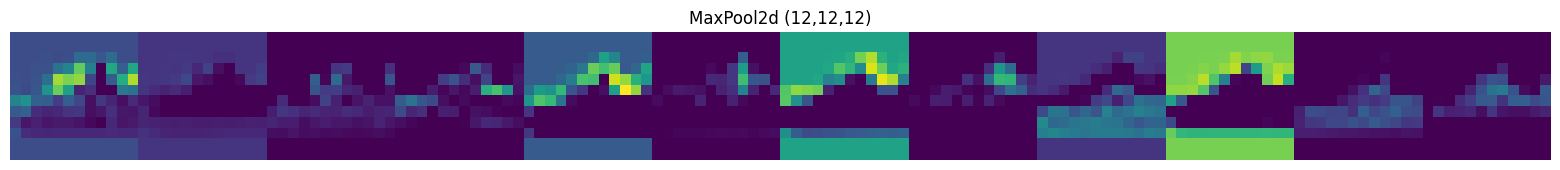

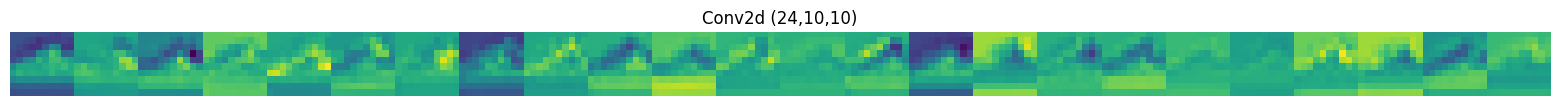

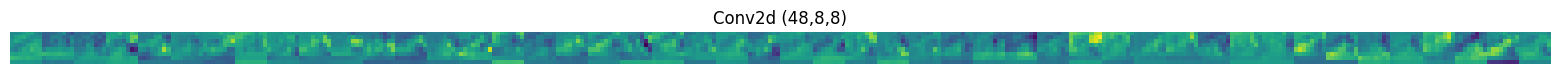

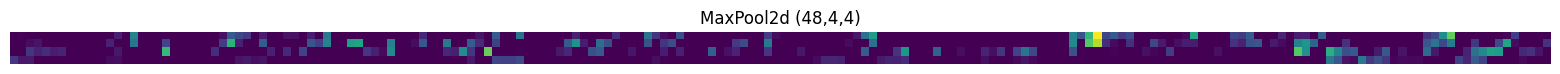

In [80]:
x2,y2= next(iter(train_dataloader))
features_cnn(modelV1,x2,y2)

# 7. Visualize

In [19]:
def visualizeLossAccuracy(eval_train,name_model):
    epoch_list,loss_train_list,loss_test_list,acc_train_list,acc_test_list = eval_train
    
    plt.figure(figsize=(18,8))
    plt.suptitle(f"Visualize Loss and Accuracy {name_model}")

    plt.subplot(1,2,1)
    plt.plot(epoch_list,loss_train_list,label="Loss of training")
    plt.plot(epoch_list,loss_test_list,label="Loss of testing")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epoch_list,acc_train_list,label="Acc of training")
    plt.plot(epoch_list,acc_test_list,label="Acc of testing")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Accuracy")
    plt.legend()

    plt.show()

- Visualize Loss and Accuracy of modelV0

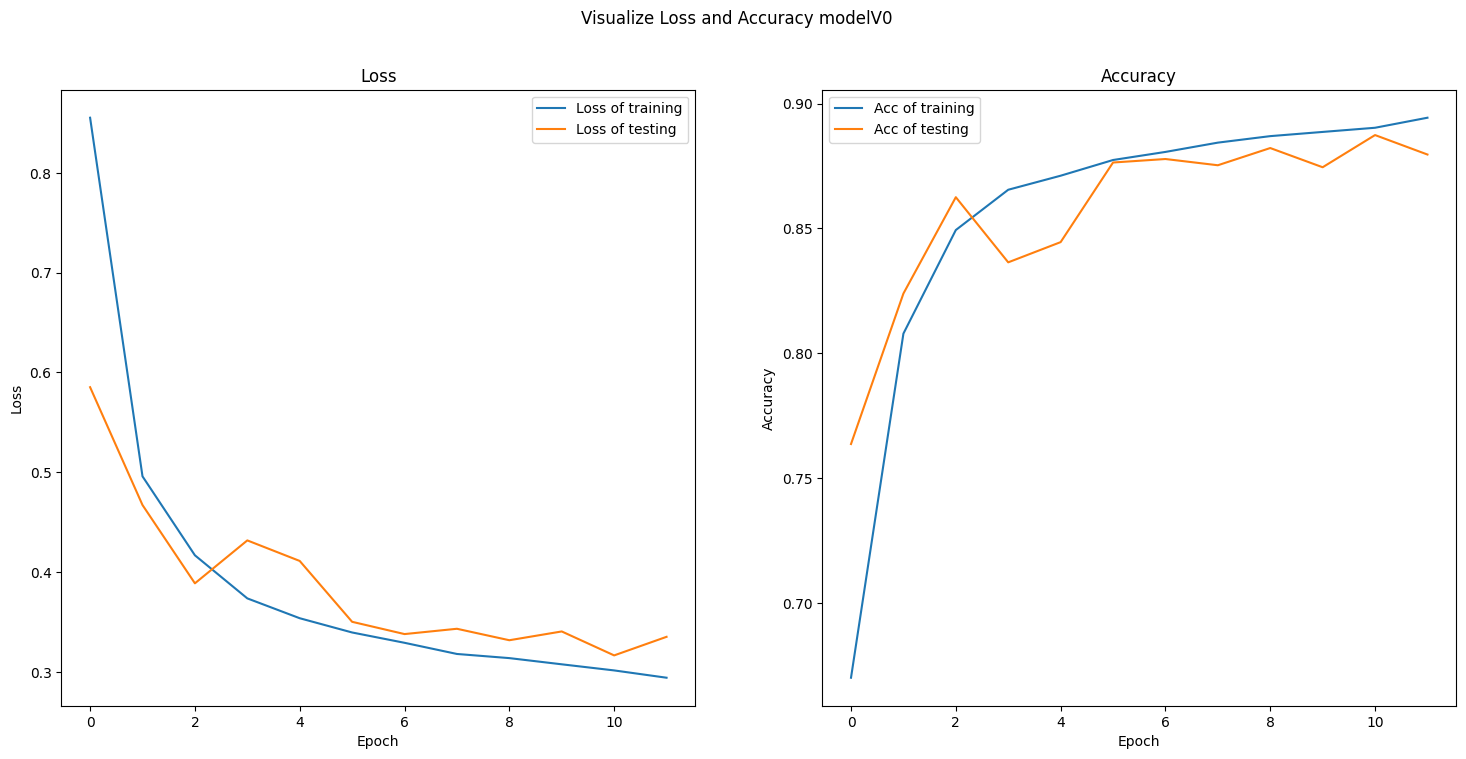

In [20]:
visualizeLossAccuracy(eval_V0,"modelV0")

- Visualize Loss and Accuracy of modelV1

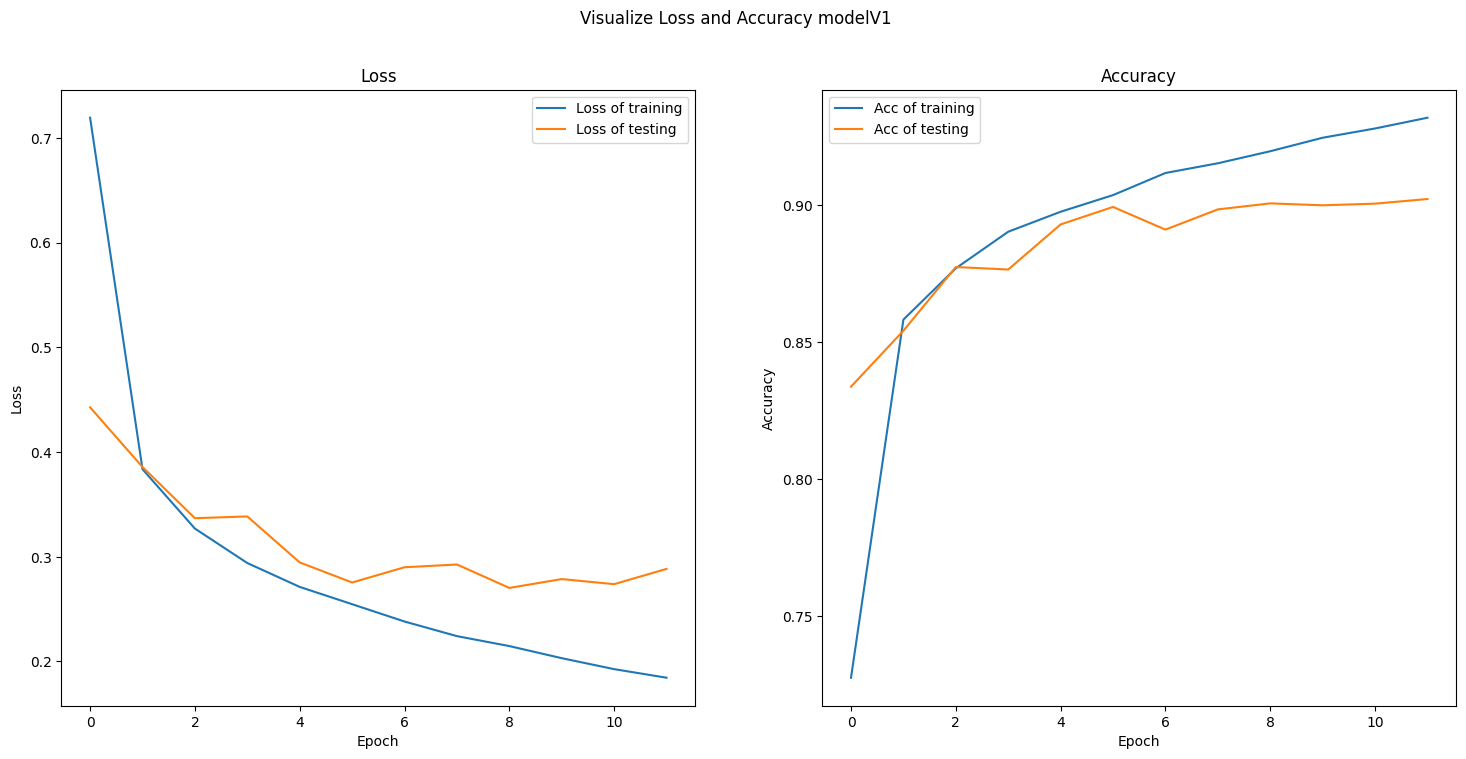

In [21]:
visualizeLossAccuracy(eval_V1,"modelV1")

- Compare 2 models

In [22]:
import pandas as pd
data = {
  "Loss Train": [eval_V0[1][-1],eval_V1[1][-1]],
  "Acc Train": [eval_V0[3][-1].numpy(),eval_V1[3][-1].numpy()],
  "Loss Test": [eval_V0[2][-1],eval_V1[2][-1]],
  "Acc Test": [eval_V0[4][-1].numpy(),eval_V1[4][-1].numpy()],
  "time": [timeV0,timeV1]
}
compare_results = pd.DataFrame(data,index = ["modelV0", "modelV1"])

compare_results

,Loss Train,Acc Train,Loss Test,Acc Test,time
modelV0,0.29415634,0.8943167,0.33513272,0.87959266,479.910834
modelV1,0.1844769,0.9320667,0.2883969,0.9023562,508.694619


- Visualize to compare 2 models

In [23]:
def visualizeLossAccuracy(eval_trainV0,eval_trainV1):
    epoch_list,_, loss_test_V0 ,_, acc_test_V0 = eval_trainV0
    epoch_list,_, loss_test_V1 ,_, acc_test_V1 = eval_trainV1
    
    plt.figure(figsize=(18,8))
    plt.suptitle("Visualize Loss and Accuracy")

    plt.subplot(1,2,1)
    plt.plot(epoch_list,loss_test_V0,label="Loss ModelV0")
    plt.plot(epoch_list,loss_test_V1,label="Loss ModelV1")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epoch_list,acc_test_V0,label="Acc ModelV0")
    plt.plot(epoch_list,acc_test_V1,label="Acc ModelV1")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Accuracy")
    plt.legend()

    plt.show()

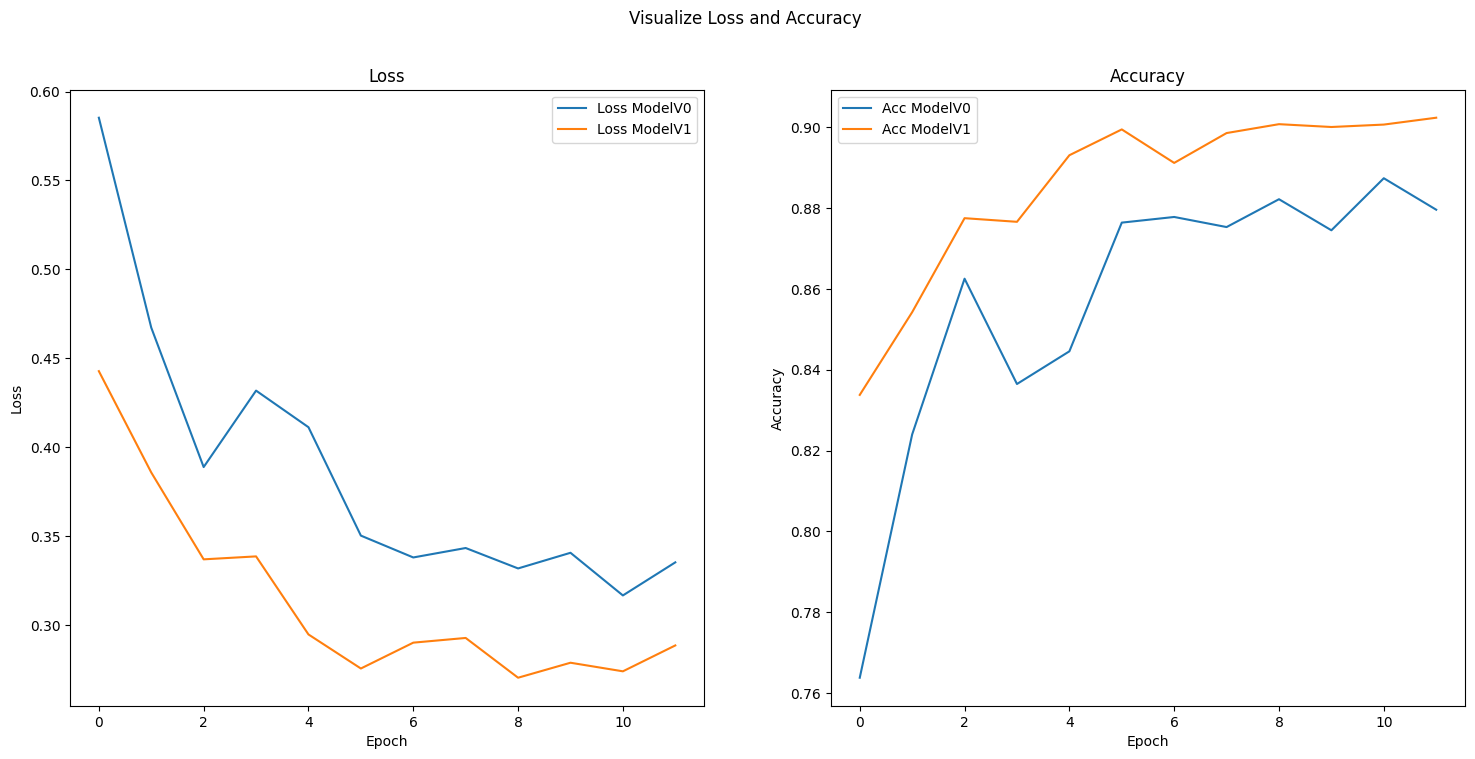

In [24]:
visualizeLossAccuracy(eval_V0,eval_V1)

# 8. Evaluting model

In [25]:
def eval_fn(model: nn.Module,
            dataloader : torch.utils.data.DataLoader,
            loss_fn: nn.CrossEntropyLoss,
            accuracy_fn):
    model.eval()
    loss = 0
    acc = 0
    y_pred_label_list = []
    with torch.inference_mode():
        for X,y in dataloader:
            y_pred = model(X)
            loss += loss_fn(y_pred,y)

            y_pred_label = y_pred.argmax(dim=1)
            y_pred_label_list.append(y_pred_label)
            acc += accuracy_fn(y_pred_label,y)

        loss /= len(dataloader)
        acc /= len(dataloader)

    y_pred_label_list = torch.cat(y_pred_label_list)
    result = {
        "name" : model.__class__.__name__ ,
        "loss" : loss.item(),
        "acc" : acc.item(),
        "label_pred" : y_pred_label_list 
    }

    return result

In [26]:
eval_modelV0 = eval_fn(modelV0,test_dataloader,loss_fn,accuracy_fn)
eval_modelV1 = eval_fn(modelV1,test_dataloader,loss_fn,accuracy_fn)

print(eval_modelV0)
print(eval_modelV1)

{'name': 'FashionMNIST_CNN_V0', 'loss': 0.3351327180862427, 'acc': 0.8795926570892334, 'label_pred': tensor([9, 2, 1,  ..., 8, 1, 5])}
{'name': 'FashionMNIST_CNN_V1', 'loss': 0.2883968949317932, 'acc': 0.9023562073707581, 'label_pred': tensor([9, 2, 1,  ..., 8, 1, 5])}


In [62]:
# See if torchmetrics,mlxtend exists, if not, install it
# try:
#     from torchmetrics import ConfusionMatrix
#     from mlxtend.plotting import plot_confusion_matrix
# except:
# !pip install mlxtend==0.21.0
!pip install mlxtend --upgrade --no-deps
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
import mlxtend
mlxtend.__version__

'0.14.0'

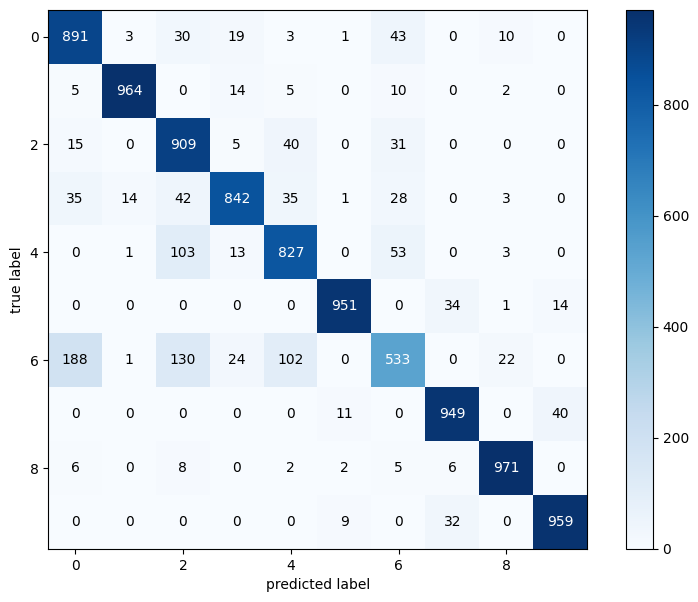

In [63]:
ConfusionMatrix_fn = ConfusionMatrix(num_classes=len(test_data.classes), task='multiclass')
confmat = ConfusionMatrix_fn(preds=eval_modelV0["label_pred"],target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat.numpy(),
    figsize=(10, 7),
    show_absolute=True,
    colorbar=True,
    class_names= test_data.classes
);

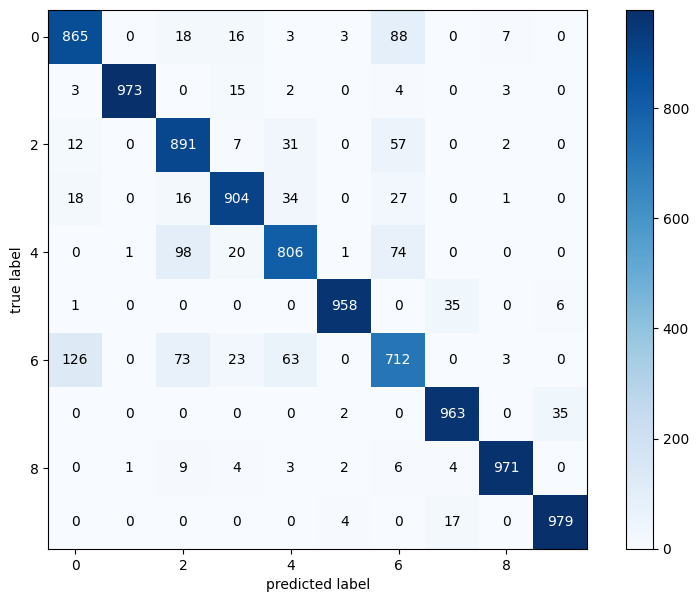

In [66]:
confmat = ConfusionMatrix_fn(preds=eval_modelV1["label_pred"],target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat.numpy(),
    class_names=test_data.classes,
    show_absolute=True,
    colorbar=True,
    figsize=(10, 7)
);

# 9. Save model

In [49]:
from pathlib import Path 
MODEL = Path("Models")
MODEL.mkdir(parents=True,exist_ok=True) 

In [81]:
MODEL_NAME_V0 = "FashionMNIST_CNN_V0_model.pth" 
MODEL_PATH_VO = MODEL / MODEL_NAME_V0
torch.save(modelV0.state_dict(),f=MODEL_PATH_VO)

In [82]:
MODEL_NAME_V1 = "FashionMNIST_CNN_V1_model.pth" 
MODEL_PATH_V1 = MODEL / MODEL_NAME_V1
torch.save(modelV1.state_dict(),f=MODEL_PATH_V1)

**END**